In [1]:
import pandas as pd
from glob import glob
from os.path import join
import numpy as np
import os
import re

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-05-02 07:48:16--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-05-02 07:48:17--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc49c78ed5ff3b61bc18df5584c.dl.dropboxusercontent.com/cd/0/get/B7TNvXJR-zuIPHmK8NVCgAabxuvK_ip29nx1LTejjVXjQTb_xYFxhDcZQg9tj8_DhC8LcvZTw_GHhJXEY9rMEFhgf3LJJRkUyRF0Gw1UwUUdvT3NxGSIui825LImnOyuc3jnMU2doxLyvFa30ZhOxZ2bySL6ZcEq2w9o6V5ULlSJfHDJji40FO-MKwrT5MSS8vc/file?dl=1# [following]
--2023-05-02 07:48:17--  https://ucc49c78ed5ff3b61bc18df5584c.dl.dropboxusercontent.com/cd/0/get/B7TNvXJR-zuI

In [5]:
!unzip osaka1.zip

Archive:  osaka1.zip
   creating: osaka/
  inflating: __MACOSX/._osaka        
  inflating: osaka/천연 노천온천 스파 스미노에.csv  
  inflating: __MACOSX/osaka/._천연 노천온천 스파 스미노에.csv  
  inflating: osaka/니시노마루 정원.csv  
  inflating: __MACOSX/osaka/._니시노마루 정원.csv  
  inflating: osaka/아베노 하루카스.csv  
  inflating: __MACOSX/osaka/._아베노 하루카스.csv  
  inflating: osaka/메이드리밍 오사카 난바점.csv  
  inflating: __MACOSX/osaka/._메이드리밍 오사카 난바점.csv  
  inflating: osaka/도톤보리 글리코 사인.csv  
  inflating: __MACOSX/osaka/._도톤보리 글리코 사인.csv  
  inflating: osaka/Hozenji Yokocho.csv  
  inflating: __MACOSX/osaka/._Hozenji Yokocho.csv  
  inflating: osaka/스미요시 타이샤.csv  
  inflating: __MACOSX/osaka/._스미요시 타이샤.csv  
  inflating: osaka/헵파이브 대관람차.csv  
  inflating: __MACOSX/osaka/._헵파이브 대관람차.csv  
  inflating: osaka/.DS_Store         
  inflating: __MACOSX/osaka/._.DS_Store  
  inflati

In [4]:
osaka = '/content/osaka'

In [5]:
all_att_reviews = glob(join(osaka,'*'))
all_att_reviews[:5]

['/content/osaka/오사카시립 나가이 식물원.csv',
 '/content/osaka/텐로쿠 상점가 진흥조합 사무소.csv',
 '/content/osaka/기시와다성.csv',
 '/content/osaka/키즈프라자 오사카.csv',
 '/content/osaka/Diamor 오사카(지하).csv']

In [6]:
total_place = []
for i in range(len(all_att_reviews)):
  total_place.append(all_att_reviews[i].split('/')[-1][:-4])
total_place[:5]

['오사카시립 나가이 식물원',
 '텐로쿠 상점가 진흥조합 사무소',
 '기시와다성',
 '키즈프라자 오사카',
 'Diamor 오사카(지하)']

In [7]:
total_review = []

for i in range(len(total_place)):
  box = pd.read_csv(all_att_reviews[i])
  reviews = []
  for i in range(len(box)):
    reviews.append(box['0'][i])
  total_review.append(reviews)

In [8]:
box2 = np.array(total_review)
box2.shape

<ipython-input-8-bee833daca7f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  box2 = np.array(total_review)


(77,)

In [9]:
total_review[0]

['낮에는 식물원 밤에는 야간조명을 켜고 일루미 공원이 됩니다. 신비로운 분위기의 조명과 음악이 식물원 경관과 잘 어우러져 차분해지고 힐링받는 밤 산책을 하기에 좋습니다. 입장료가 비싼편이나 한번쯤 경험해볼만 합니다.',
 '꼭 한 번 가보고 싶었는데 다녀왔어요\n식물원은 어디를 가도 옳습니당\n츠루마 료쿠치역에 있는 식물원보다 규모는 작아요\n굳이 시간내서 올 것까진 아니고 근처에 볼 일 있으면 와보는거 추천합니당',
 '4월 초 벚꽃시즌에 간다면 좋은 선택이 될 수 있다. 식물원까지 가는 길은 마치 한국의 여의도 공원과 비슷하다. 현지인들이 매우 많아 확실히 일본에 온 듯한 느낌을 받음. 식물원 내부는 또 다른 하나의 공원 형식이다.  꽤나 걸어야하며, 외부 공원인만큼 방문 시기와 날씨 및 계절이 크게 매력도를 좌우할 듯 싶다. 4~5월 경 날씨좋은 점심 시간에 방문을 추천. 다만 개인적으로 비슷한 성격의 다른 관광지인 사쿠야 코노하나칸이 더욱 매력적일듯 싶다.',
 '#나가이식물원 #도시락 은 필수~ #오사카 약간 외지 지역이라 거의 #현지인 이 대부분~\n사진을 전문으로 찍는 할아버지와 그림그리는 아주머니들과 초등학생이 대부분 그 외 사람은 찾아볼수 없음\n주유패스 사용가능하지만 일정 빡빡하다면 패스해도 됨',
 '자녀들과 함께가기 좋은 곳이다.\n다만, 한여름에 가기에는 야외공원과 식물원까지 가는길이 너무 덥다.',
 '도쿄 팀랩을 기대하고 가면 조금 실망할 수도 있지만 일정에 여유가 있다면 가보는 것 추천드려요.',
 '나가이 공원이라는 굉장히 큰 공원안에 있는 작은 공원같은 느낌입니다. 여느 식물원처럼 식물종류댜로 키워드고 구경하게 둔다기 보다는 잘 가꿔진 공원같은 느낌입니다.\n5월 말에 갔어서 일반적인 꽃들이나 잘 자라있는 나무만 있지만, 사진 찍으면서 놀거나 쉬어가기엔 좋은거 같습니다.\n근데 여기를 들리기엔 조금 아깝다고 느낄수도 있습니다. 바로안에 자연사박물관이 있지만, 다 일본어라 그냥 지나가면서 보는정도 밖에 안되고, 주유패스로 간다고

In [10]:
df = np.array(total_review[0])
df = pd.DataFrame(df, columns=['reviews'])
print(df.head(5))

                                             reviews
0  낮에는 식물원 밤에는 야간조명을 켜고 일루미 공원이 됩니다. 신비로운 분위기의 조명...
1  꼭 한 번 가보고 싶었는데 다녀왔어요\n식물원은 어디를 가도 옳습니당\n츠루마 료쿠...
2  4월 초 벚꽃시즌에 간다면 좋은 선택이 될 수 있다. 식물원까지 가는 길은 마치 한...
3  #나가이식물원 #도시락 은 필수~ #오사카 약간 외지 지역이라 거의 #현지인 이 대...
4  자녀들과 함께가기 좋은 곳이다.\n다만, 한여름에 가기에는 야외공원과 식물원까지 가...


In [11]:
tot_reviews = list(df['reviews'])
len(tot_reviews)

706

In [12]:
tokenized_reviews = [r.split() for r in reviews]
len(tokenized_reviews[0])

63

In [13]:
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_token[0]

63

In [14]:
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]
review_len_by_eumjeol[0]

204

Text(0, 0.5, 'Number of Reviews')

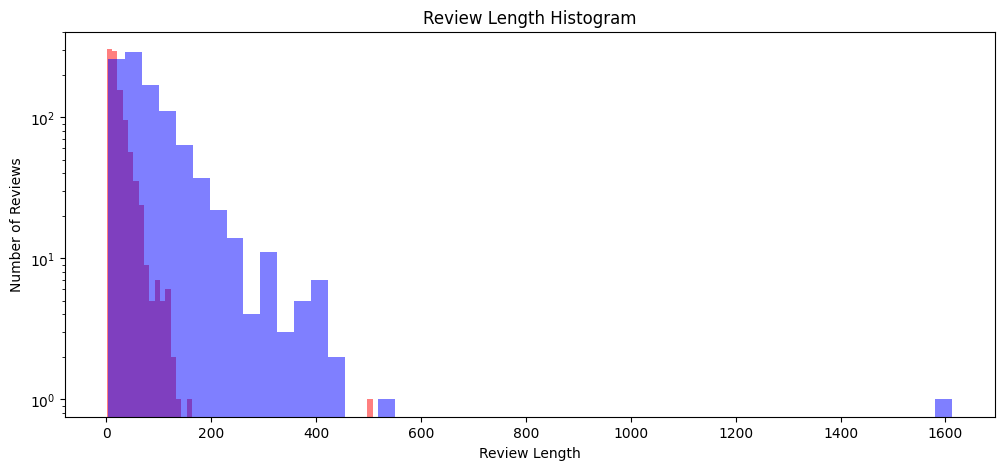

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [16]:
print(f'문장 최대길이 : {np.max(review_len_by_token)}')
print(f'문장 최소길이 : {np.min(review_len_by_token)}')
print(f'문장 평균길이 : {np.mean(review_len_by_token).round(2)}')
print(f'문장 길이 표준편차 : {np.std(review_len_by_token).round(2)}')
print(f'문장 중간길이 : {np.median(review_len_by_token)}')
print(f'제 1 사분위 길이 : {np.percentile(review_len_by_token, 25)}')
print(f'제 3 사분위 길이 : {np.percentile(review_len_by_token, 75)}')

문장 최대길이 : 508
문장 최소길이 : 1
문장 평균길이 : 24.82
문장 길이 표준편차 : 26.16
문장 중간길이 : 18.0
제 1 사분위 길이 : 10.0
제 3 사분위 길이 : 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7826c4d660>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7826c4db70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7826c4d3c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7826c4e0e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7826c4e620>],
 'means': [<matplotlib.lines.Line2D at 0x7f7826c4e380>]}

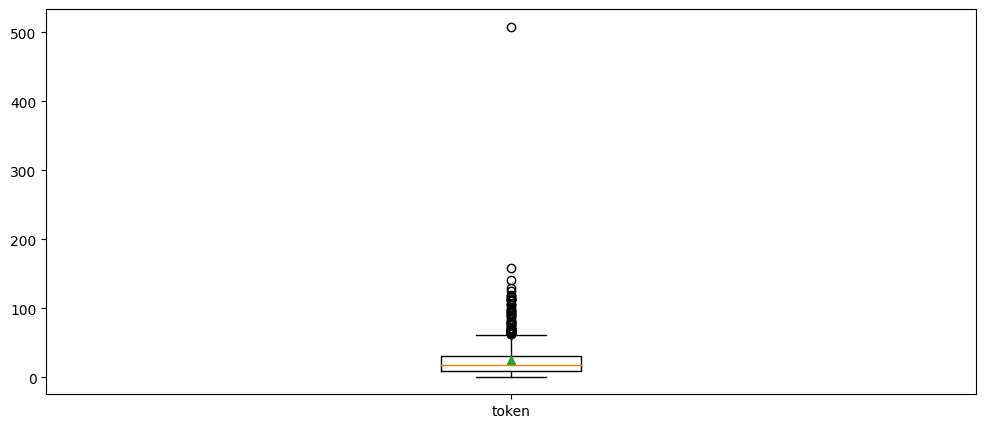

In [17]:
plt.figure(figsize=(12, 5))

plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7826c9a4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7826c9aa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7826c9a230>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7826c9af50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7826c9b490>],
 'means': [<matplotlib.lines.Line2D at 0x7f7826c9b1f0>]}

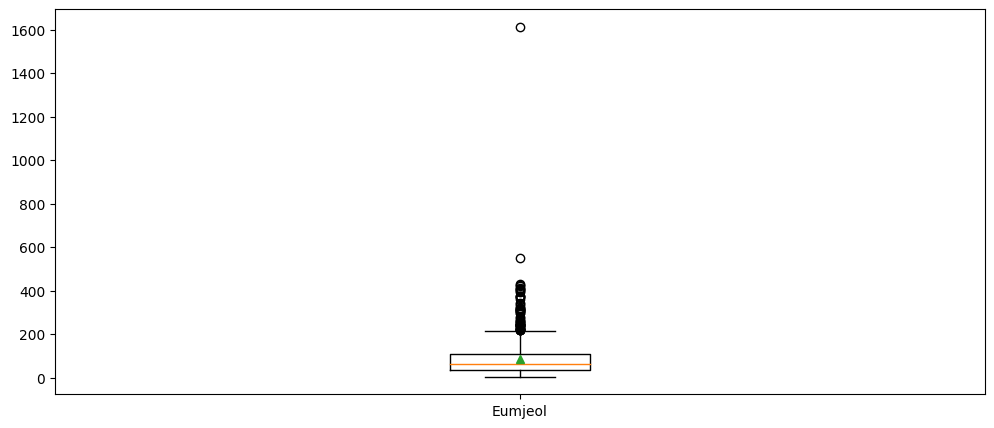

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
            labels=['Eumjeol'],
            showmeans=True)

In [22]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate(' '.join(df['reviews']))

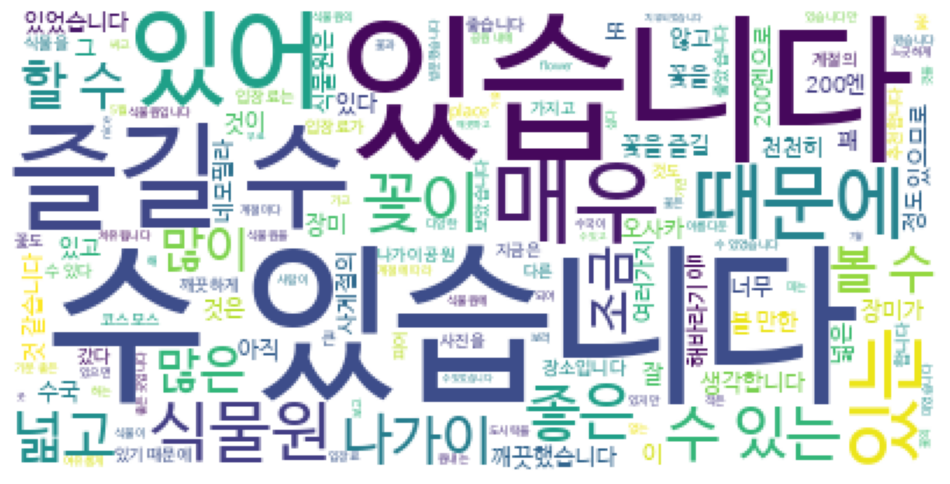

In [23]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

In [24]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Text(0, 0.5, '빈도 수')

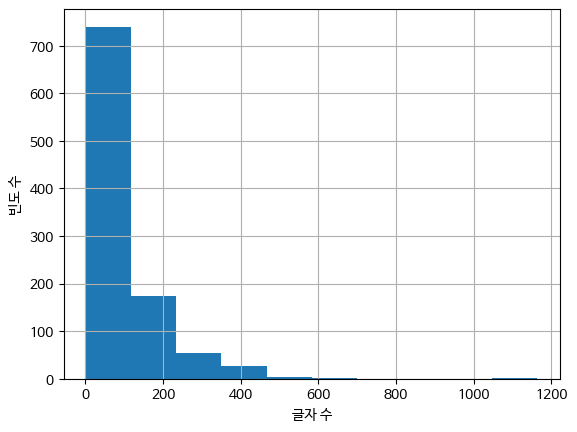

In [15]:
review_hist = df['reviews'].str.len().hist()

review_hist.set_xlabel('글자 수')
review_hist.set_ylabel('빈도 수')

Text(0, 0.5, '빈도 수')

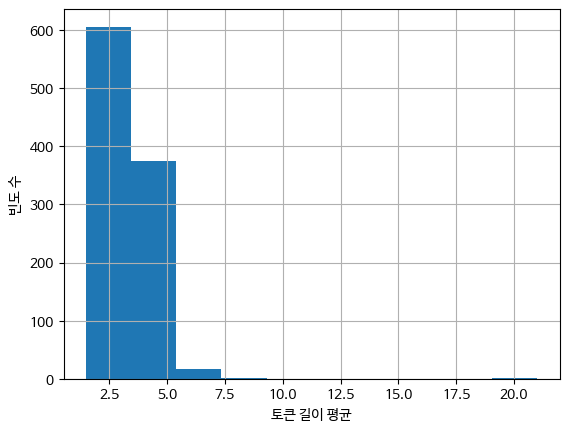

In [17]:
token_hist = df['reviews'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

token_hist.set_xlabel('토큰 길이 평균')
token_hist.set_ylabel('빈도 수')

<Axes: >

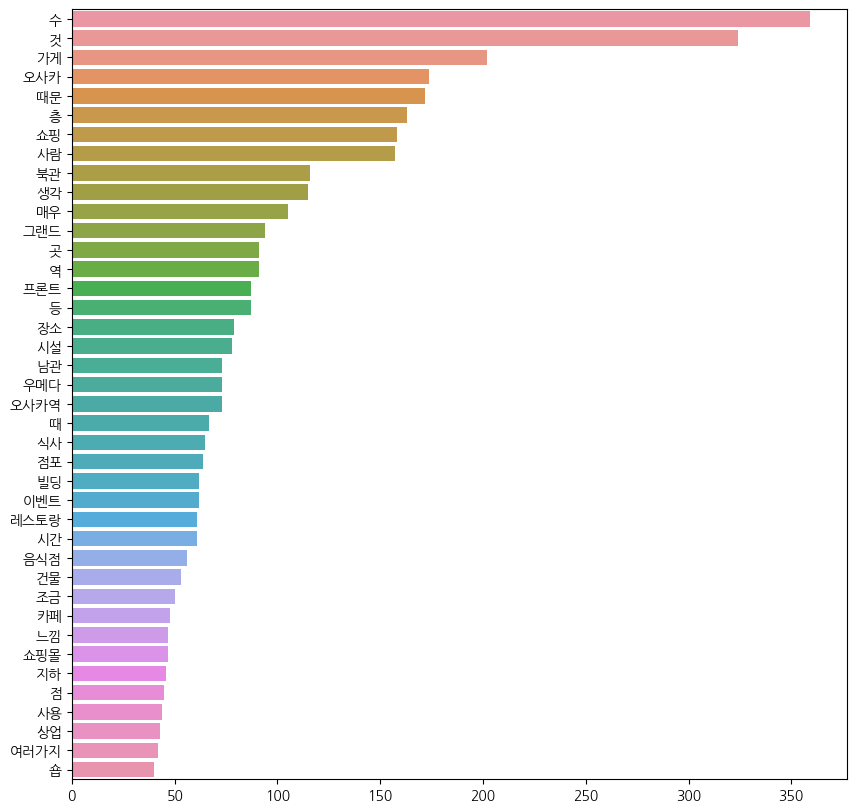

In [21]:
import collections
import seaborn as sns
from konlpy.tag import *

tagger = Mecab()
okt = Okt()

reviews = df['reviews'].to_list()
n_corpus = []
for t in reviews:
    n_corpus += okt.nouns(t) #mecab에서 명사 추출

count = collections.Counter(n_corpus)
most = count.most_common() #빈도 수 순으로 추출

x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '명사')]

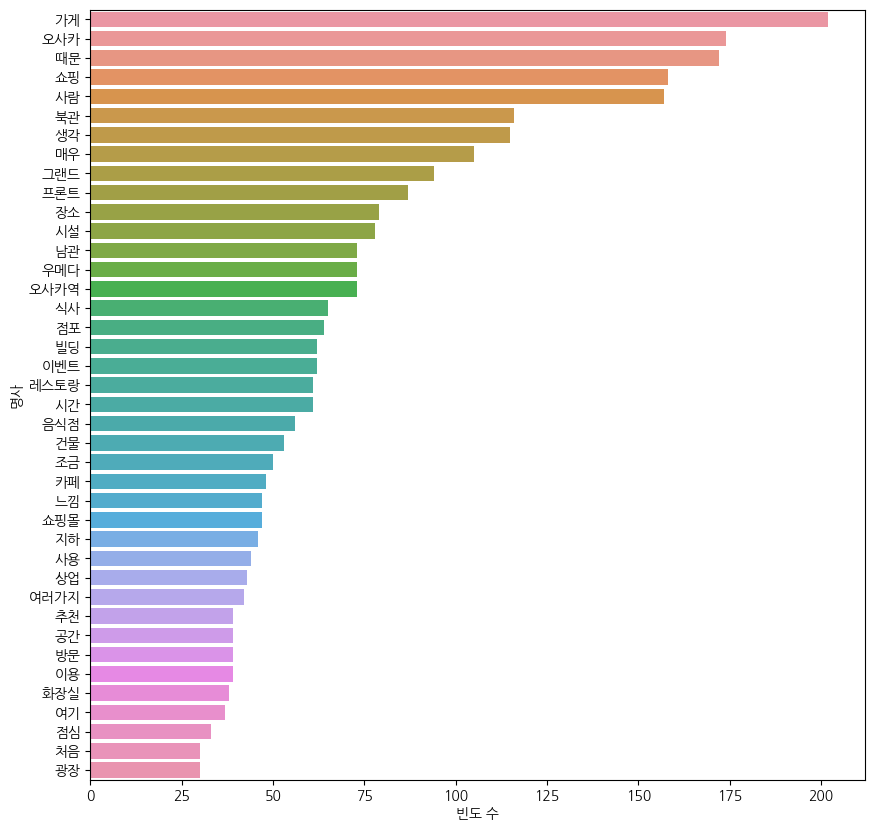

In [23]:
n_corpus2 = []
for t in reviews:
    for n in okt.nouns(t):
        if len(n)>1:
            n_corpus2.append(n)

count = collections.Counter(n_corpus2)
most = count.most_common() #빈도 수 순으로 추출

x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,10))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '명사')


[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '형태소')]

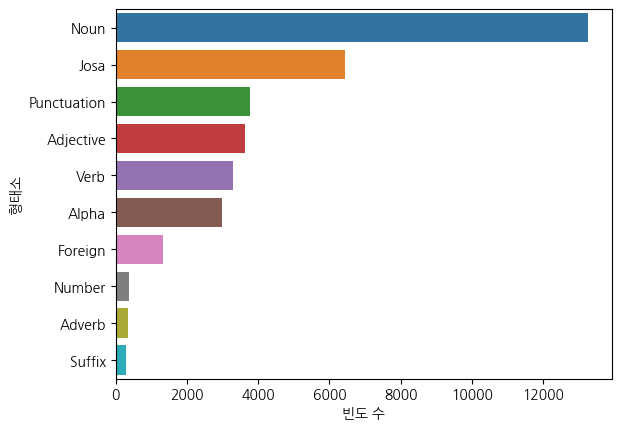

In [25]:
tags = []
for t in reviews:
    temp = okt.pos(t)
    for p in temp:
        tags.append(p[1])

counter=collections.Counter(tags)


x,y=list(map(list,zip(*counter.most_common(10))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '형태소')

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

m_corpus = []
for t in reviews:
    m_corpus.append(' '.join(okt.morphs(t)))


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram 어절')]

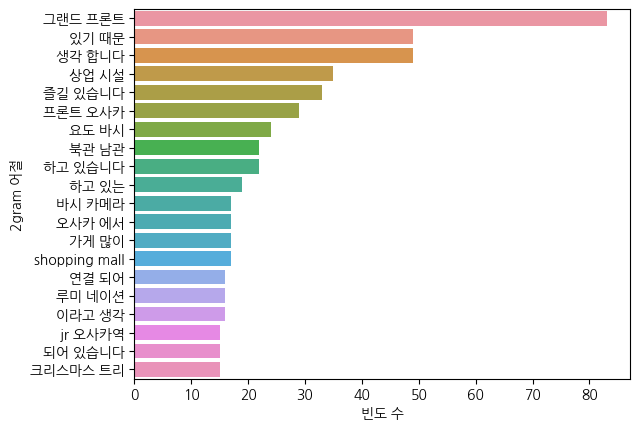

In [28]:
top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '2gram 어절')

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '3gram 형태소')]

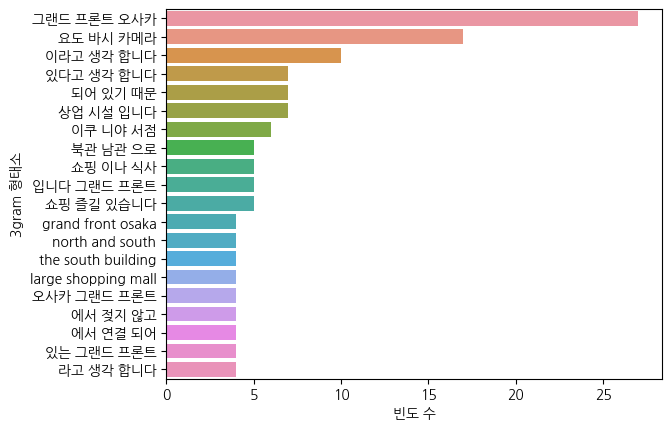

In [29]:
top_n_bigrams=get_top_ngram(m_corpus,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')